### IMPORTING MODULES:

In [1]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Modelling 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Tabulating the results

from tabulate import tabulate

### Model Validation

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Remove unnecessary warnings### READING THE CSV FILE:

import warnings
warnings.filterwarnings('ignore')

### READING THE CSV FILE:

In [2]:
df1 = pd.read_csv('breast-cancer-wisconin-data.csv')
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df1.shape

(569, 33)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
### CHECKING IF THE DATASET IS BALANCED:

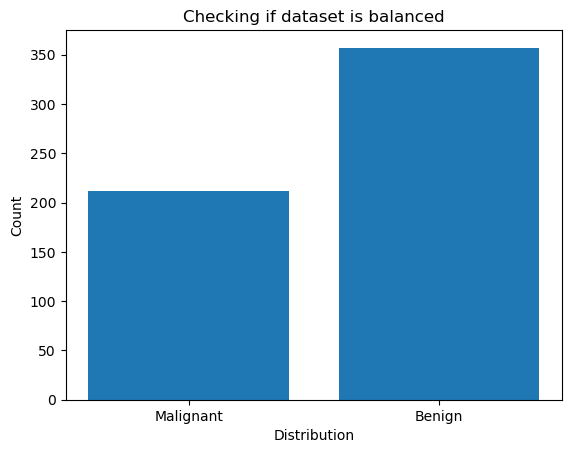

Percentage of Malignant Cancer Cases: 37.26%
Percentage of Benign Cancer Cases: 62.74%


In [6]:
labels = ['Malignant', 'Benign']
values = [len(df1[df1['diagnosis'] == 'M']), len(df1[df1['diagnosis'] == 'B'])] 

plt.title('Checking if dataset is balanced')
plt.xlabel('Distribution')
plt.ylabel('Count')
plt.bar(labels, values)
plt.show()

print('Percentage of Malignant Cancer Cases: {}%'.format(round((values[0] * 100)/sum(values), 2)))
print('Percentage of Benign Cancer Cases: {}%'.format(round((values[1] * 100)/sum(values), 2)))

Any dataset whose proportion of minority class is ranges between 20-40% of the dataset is said to have a mild degree of imbalance which is our case.

### DATA PRE-PROCESSING:

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

1. Datatypes, Missing Data, and Summary Statistics
2. Drop unnecessary columns
3. Data Transformation
4. Feature encoding

#### Removing the last column "Unammed:32" consisting of all null values:

In [7]:
df1.drop(['Unnamed: 32'], axis='columns', inplace=True)

In [8]:
df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Changing the column type of the target column "diagnosis" from 'object' to 'category':

In [9]:
df1.diagnosis = df1.diagnosis.astype('category')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

From the above dataset info we can see that the target variable datatype has been changed from object to category. 
We can also observe that all the features of the dataset are numerical columns, i.e., consist of continuous values.

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


#### Identifying columns with missing values:

In [12]:
df1.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We can see that no missing values exist for any column in the dataset

#### Dropping ID column:
We are dropping the ID column as it acts like the counter or index of a record.

In [13]:
df2 = df1.drop(['id'], axis='columns')

In [14]:
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### DATA TRANSFORMATION:

#### Min-max scaling:

The main reason behind normalizing/standardizing the data is that variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating bias. By perfroming normalization we are able to make every datapoint have the same scale so each feature is equally important.

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

min_max_normalization = (value - min)/(max - min)

In [15]:
def min_max_scaling(original_df, new_df, col):
    data = list(original_df[col])
    new_data = [(value - min(data))/(max(data) - min(data)) for value in data]
    new_df[col] = new_data

In [16]:
columns = list(df2.columns)
df3 = df2.copy()
for col in columns[1:]:
    min_max_scaling(df2, df3, col)

In [17]:
df3.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### FEATURE ENCODING:

In the dataset, we have one categorical column - diagnosis (target variable). Here, the value 'M' means malignant and 'B' means benign. A benign tumor has distinct, smooth, regular borders. A malignant tumor has irregular borders and grows faster than a benign tumor. A malignant tumor can also spread to other parts of your body. A benign tumor can become quite large, but it will not invade nearby tissue or spread to other parts of your body.

Here, we will use 0-1 encoding such that M means 1 and B means 0.

In [18]:
target_column = df3['diagnosis']
encoded_target = [0 if value == 'B' else 1 for value in target_column]
encoded_target[0:5]

[1, 1, 1, 1, 1]

In [19]:
df4 = df3.copy()
df4['diagnosis'] = encoded_target
df4.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### SAVING CLEANED DATA IN CSV FORMAT:

In [20]:
df4.to_csv("breast-cancer-wisconin-data-cleaned.csv")

### MODELING:

We will be using the following classification models for prediction:
- Logistic regression
- Support vector classification
- K-nearest neighbours 
- Naive Bayes 
- Decision tree 
- Random forest

#### Splitting the dataset:

In [21]:
X = df4.drop(columns=['diagnosis'], axis = 'columns')
y = df4.diagnosis

In [22]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [24]:
X.shape

(569, 30)

In [25]:
### Dividing the data into training and test sets in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 27)

In [26]:
display(X_train.shape)
display(X_test.shape)

(455, 30)

(114, 30)

#### Fit Model:

In this section, we use various machine learning models to predict the results for our sample test data (X_test). Based on the performance of each model, we select one best model based on the model's accuracy. We will store the model and its accuracy so that we can tabulate them later for choosing the best model.

In [27]:
### Dictionary to store model and its accuracy
model_accuracy = OrderedDict()

In [28]:
### Dictionary to store model and its recall
model_recall = OrderedDict()

### Applying Logistic Regression:

In [29]:
logistic_classifier = LogisticRegression(random_state = 27)
logistic_classifier.fit(X_train, y_train)

LogisticRegression(random_state=27)

In [30]:
y_pred_logistic = logistic_classifier.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Plotting Confusion Matrix:

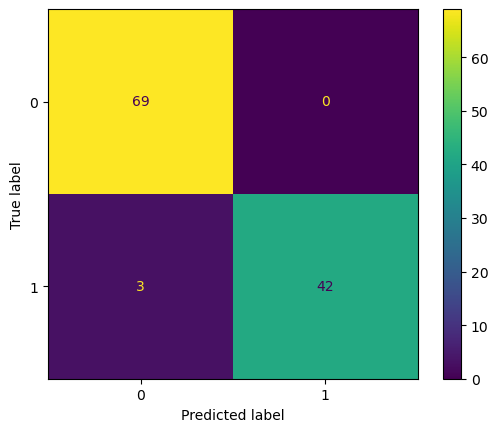

In [32]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_logistic)
cm_display.plot()
plt.show()

In [33]:
logistic_accuracy = round(100 * accuracy_score(y_test, y_pred_logistic), 2)
model_accuracy['Logistic Regression'] = logistic_accuracy

logistic_recall = round(100 * recall_score(y_test, y_pred_logistic), 2)
model_recall['Logistic Regression'] = logistic_recall

print('The accuracy of this model is {} %.'.format(logistic_accuracy))
print('The recall of this model is {} %.'.format(logistic_recall))

The accuracy of this model is 97.37 %.
The recall of this model is 93.33 %.


### Applying Support Vector Classification - Linear:

In [34]:
linear_svm_classifier = SVC(kernel = 'linear', random_state = 27)
linear_svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=27)

In [35]:
y_pred_svm_linear = linear_svm_classifier.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred_svm_linear))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Plotting Confusion Matrix:

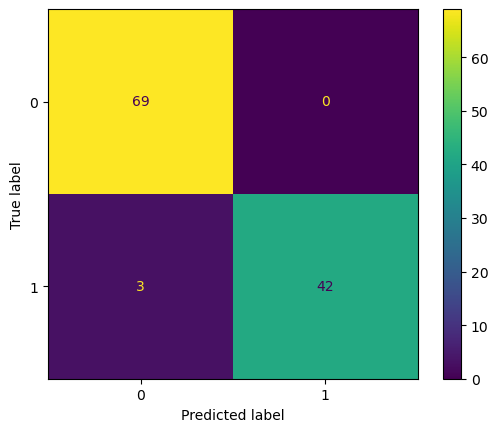

In [37]:
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)
cm_display_svm_linear = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_svm_linear)
cm_display_svm_linear.plot()
plt.show()

In [38]:
linear_svm_accuracy = round(100 * accuracy_score(y_test, y_pred_svm_linear), 2)
model_accuracy['Linear SVM'] = linear_svm_accuracy

linear_svc_recall = round(100 * recall_score(y_test, y_pred_svm_linear), 2)
model_recall['Linear SVM'] = linear_svc_recall

print('The accuracy of this model is {} %.'.format(linear_svm_accuracy))
print('The recall of this model is {} %.'.format(linear_svc_recall))

The accuracy of this model is 97.37 %.
The recall of this model is 93.33 %.


### Applying Support Vector Classification - Kernel:

In [39]:
kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 27)
kernel_svm_classifier.fit(X_train, y_train)

SVC(random_state=27)

In [40]:
y_pred_svm_kernel = kernel_svm_classifier.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred_svm_kernel))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       1.00      0.96      0.98        45

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#### Plotting Confusion Matrix:

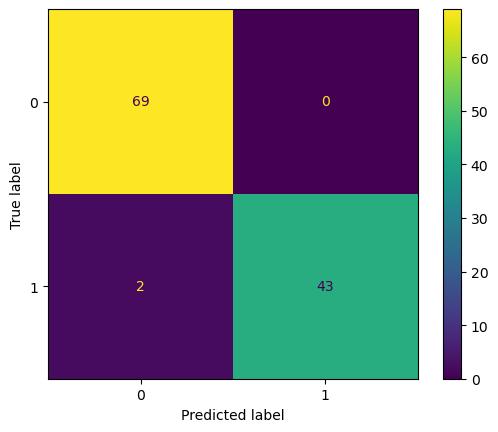

In [42]:
cm_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel)
cm_display_svm_kernel = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_svm_kernel)
cm_display_svm_kernel.plot()
plt.show()

In [43]:
kernel_svm_accuracy = round(100 * accuracy_score(y_test, y_pred_svm_kernel), 2)
model_accuracy['Kernel SVM'] = kernel_svm_accuracy

kernel_svc_recall = round(100 * recall_score(y_test, y_pred_svm_kernel), 2)
model_recall['Kernel SVM'] = kernel_svc_recall

print('The accuracy of this model is {} %.'.format(kernel_svm_accuracy))
print('The recall of this model is {} %.'.format(kernel_svc_recall))

The accuracy of this model is 98.25 %.
The recall of this model is 95.56 %.


### Applying K-Nearest Neighbours:

**1-NN Model:**

In [44]:
classifier_1nn = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_1nn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
y_pred_1nn = classifier_1nn.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_1nn))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        69
           1       0.93      0.93      0.93        45

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### Plotting Confusion Matrix:

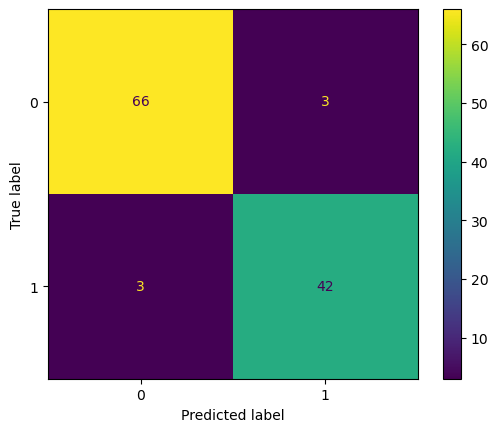

In [47]:
cm_1nn = confusion_matrix(y_test, y_pred_1nn)
cm_display_1nn = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_1nn)
cm_display_1nn.plot()
plt.show()

In [48]:
classifier_1nn_accuracy = round(100 * accuracy_score(y_test, y_pred_1nn), 2)
model_accuracy['K - Nearest Neighbors (1 NN)'] = classifier_1nn_accuracy

classifier_1nn_recall = round(100 * recall_score(y_test, y_pred_1nn), 2)
model_recall['K - Nearest Neighbors (1 NN)'] = classifier_1nn_recall

print('The accuracy of this model is {} %.'.format(classifier_1nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_1nn_recall))

The accuracy of this model is 94.74 %.
The recall of this model is 93.33 %.


**3-NN Model:**

In [49]:
classifier_3nn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_3nn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_pred_3nn = classifier_3nn.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred_3nn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        69
           1       0.98      0.96      0.97        45

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Plotting Confusion Matrix:

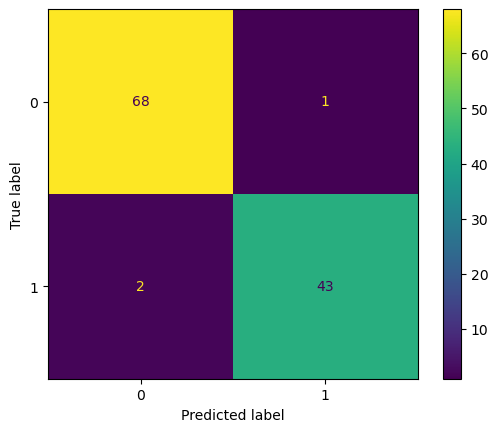

In [52]:
cm_3nn = confusion_matrix(y_test, y_pred_3nn)
cm_display_3nn = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_3nn)
cm_display_3nn.plot()
plt.show()

In [53]:
classifier_3nn_accuracy = round(100 * accuracy_score(y_test, y_pred_3nn), 2)
model_accuracy['K - Nearest Neighbors (3 NN)'] = classifier_3nn_accuracy

classifier_3nn_recall = round(100 * recall_score(y_test, y_pred_3nn), 2)
model_recall['K - Nearest Neighbors (3 NN)'] = classifier_3nn_recall

print('The accuracy of this model is {} %.'.format(classifier_3nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_3nn_recall))

The accuracy of this model is 97.37 %.
The recall of this model is 95.56 %.


**5-NN Model:**

In [54]:
classifier_5nn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_5nn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred_5nn = classifier_5nn.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred_5nn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        69
           1       0.98      0.96      0.97        45

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Plotting Confusion Matrix:

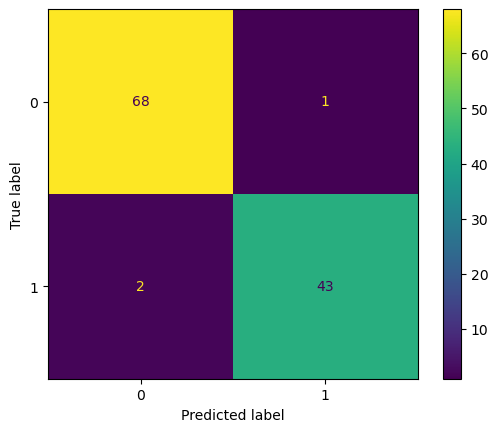

In [57]:
cm_5nn = confusion_matrix(y_test, y_pred_5nn)
cm_display_5nn = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_5nn)
cm_display_5nn.plot()
plt.show()

In [58]:
classifier_5nn_accuracy = round(100 * accuracy_score(y_test, y_pred_5nn), 2)
model_accuracy['K - Nearest Neighbors (5 NN)'] = classifier_5nn_accuracy

classifier_5nn_recall = round(100 * recall_score(y_test, y_pred_5nn), 2)
model_recall['K - Nearest Neighbors (5 NN)'] = classifier_5nn_recall

print('The accuracy of this model is {} %.'.format(classifier_5nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_5nn_recall))

The accuracy of this model is 97.37 %.
The recall of this model is 95.56 %.


**7-NN Model:**

In [59]:
classifier_7nn = KNeighborsClassifier(n_neighbors = 7, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_7nn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [60]:
y_pred_7nn = classifier_7nn.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred_7nn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        69
           1       0.98      0.96      0.97        45

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Plotting Confusion Matrix:

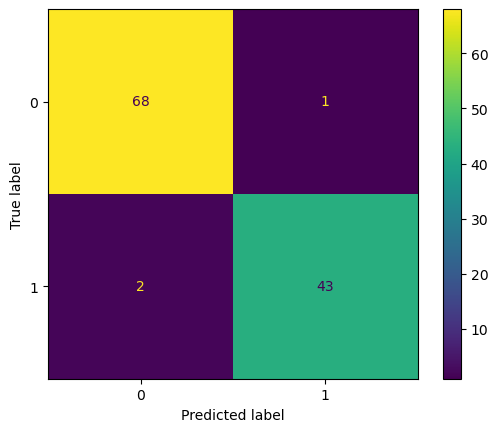

In [62]:
cm_7nn = confusion_matrix(y_test, y_pred_7nn)
cm_display_7nn = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_7nn)
cm_display_7nn.plot()
plt.show()

In [63]:
classifier_7nn_accuracy = round(100 * accuracy_score(y_test, y_pred_7nn), 2)
model_accuracy['K - Nearest Neighbors (7 NN)'] = classifier_7nn_accuracy

classifier_7nn_recall = round(100 * recall_score(y_test, y_pred_7nn), 2)
model_recall['K - Nearest Neighbors (7 NN)'] = classifier_7nn_recall

print('The accuracy of this model is {} %.'.format(classifier_7nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_7nn_recall))

The accuracy of this model is 97.37 %.
The recall of this model is 95.56 %.


**9-NN Model:**

In [64]:
classifier_9nn = KNeighborsClassifier(n_neighbors = 9, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_9nn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [65]:
y_pred_9nn = classifier_9nn.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred_9nn))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        69
           1       0.98      0.91      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Plotting Confusion Matrix:

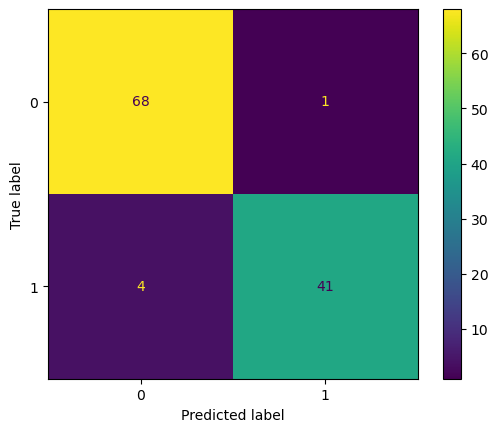

In [67]:
cm_9nn = confusion_matrix(y_test, y_pred_9nn)
cm_display_9nn = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_9nn)
cm_display_9nn.plot()
plt.show()

In [68]:
classifier_9nn_accuracy = round(100 * accuracy_score(y_test, y_pred_9nn), 2)
model_accuracy['K - Nearest Neighbors (9 NN)'] = classifier_9nn_accuracy

classifier_9nn_recall = round(100 * recall_score(y_test, y_pred_9nn), 2)
model_recall['K - Nearest Neighbors (9 NN)'] = classifier_9nn_recall

print('The accuracy of this model is {} %.'.format(classifier_9nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_9nn_recall))

The accuracy of this model is 95.61 %.
The recall of this model is 91.11 %.


**11-NN Model:**

In [69]:
classifier_11nn = KNeighborsClassifier(n_neighbors = 11, algorithm = 'auto', p = 2, metric = 'minkowski')
classifier_11nn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [70]:
y_pred_11nn = classifier_11nn.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred_11nn))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        69
           1       0.98      0.89      0.93        45

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### Plotting Confusion Matrix:

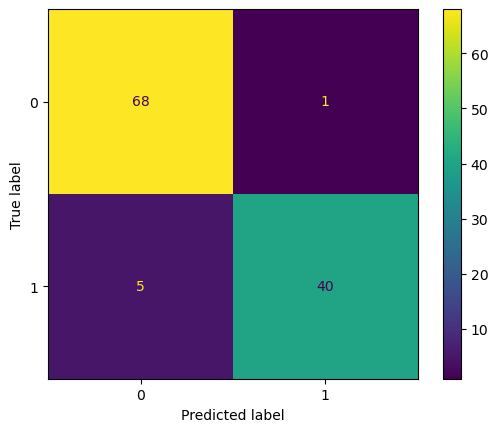

In [72]:
cm_11nn = confusion_matrix(y_test, y_pred_11nn)
cm_display_11nn = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_11nn)
cm_display_11nn.plot()
plt.show()

In [73]:
classifier_11nn_accuracy = round(100 * accuracy_score(y_test, y_pred_11nn), 2)
model_accuracy['K - Nearest Neighbors (11 NN)'] = classifier_11nn_accuracy

classifier_11nn_recall = round(100 * recall_score(y_test, y_pred_11nn), 2)
model_recall['K - Nearest Neighbors (11 NN)'] = classifier_11nn_recall

print('The accuracy of this model is {} %.'.format(classifier_11nn_accuracy))
print('The recall of this model is {} %.'.format(classifier_11nn_recall))

The accuracy of this model is 94.74 %.
The recall of this model is 88.89 %.


#### Plotting accuracy graph of all the nearest neighbors:

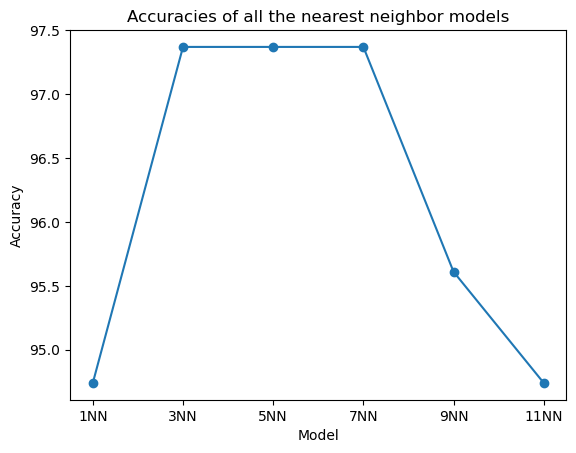

In [74]:
labels = ['1NN', '3NN', '5NN', '7NN', '9NN', '11NN']
values = [classifier_1nn_accuracy, classifier_3nn_accuracy, classifier_5nn_accuracy, classifier_7nn_accuracy, 
          classifier_9nn_accuracy, classifier_11nn_accuracy]
plt.title('Accuracies of all the nearest neighbor models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.plot(labels, values, 'o-')
plt.show()

### Applying Gaussian Naive Bayes Classification:

In [75]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [76]:
y_pred_gnb = naive_bayes_classifier.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        69
           1       0.98      0.91      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Plotting Confusion Matrix:

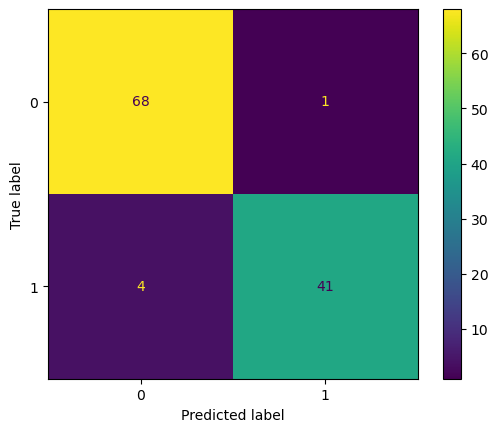

In [78]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_display_gnb = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_gnb)
cm_display_gnb.plot()
plt.show()

In [79]:
naive_bayes_accuracy = round(100 * accuracy_score(y_test, y_pred_gnb), 2)
model_accuracy['Gaussian Naive Bayes'] = naive_bayes_accuracy

naive_bayes_recall = round(100 * recall_score(y_test, y_pred_gnb), 2)
model_recall['Gaussian Naive Bayes'] = naive_bayes_recall

print('The accuracy of this model is {} %.'.format(naive_bayes_accuracy))
print('The recall of this model is {} %.'.format(naive_bayes_recall))

The accuracy of this model is 95.61 %.
The recall of this model is 91.11 %.


### Applying Decision Tree Classification:

In [80]:
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=27)

In [81]:
y_pred_dt = decision_tree_classifier.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        69
           1       0.88      0.93      0.90        45

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



#### Plotting Confusion Matrix:

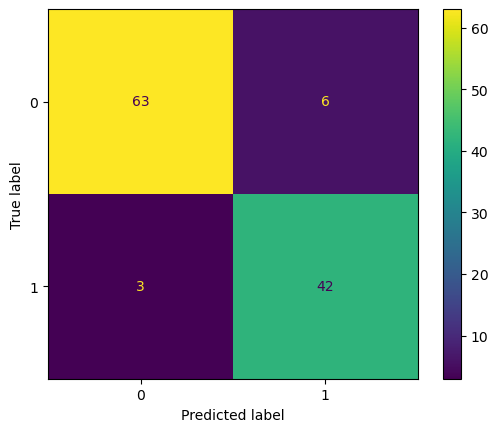

In [83]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_display_dt = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_dt)
cm_display_dt.plot()
plt.show()

In [84]:
Y_pred = decision_tree_classifier.predict(X_test)

In [85]:
decision_tree_accuracy = round(100 * accuracy_score(y_test, y_pred_dt), 2)
model_accuracy['Decision Tree Classification'] = decision_tree_accuracy

decision_tree_recall = round(100 * recall_score(y_test, y_pred_dt), 2)
model_recall['Decision Tree Classification'] = decision_tree_recall

print('The accuracy of this model is {} %.'.format(decision_tree_accuracy))
print('The recall of this model is {} %.'.format(decision_tree_recall))

The accuracy of this model is 92.11 %.
The recall of this model is 93.33 %.


### Applying Random Forest Classification - 10 Trees:

In [86]:
random_forest_10_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 27)
random_forest_10_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=27)

In [87]:
y_pred_rf10 = random_forest_10_classifier.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred_rf10))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        69
           1       0.95      0.91      0.93        45

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### Plotting Confusion Matrix:

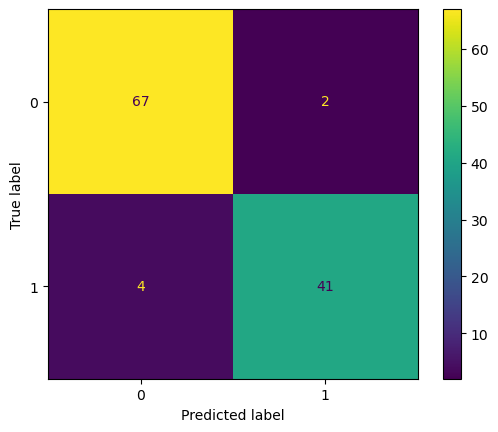

In [89]:
cm_rf10 = confusion_matrix(y_test, y_pred_rf10)
cm_display_rf10 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf10)
cm_display_rf10.plot()
plt.show()

In [90]:
random_forest_10_accuracy = round(100 * accuracy_score(y_test, y_pred_rf10), 2)
model_accuracy['Random Forest Classification (10 trees)'] = random_forest_10_accuracy

random_forest_10_recall = round(100 * recall_score(y_test, y_pred_rf10), 2)
model_recall['Random Forest Classification (10 trees)'] = random_forest_10_recall

print('The accuracy of this model is {} %.'.format(random_forest_10_accuracy))
print('The recall of this model is {} %.'.format(random_forest_10_recall))

The accuracy of this model is 94.74 %.
The recall of this model is 91.11 %.


### Applying Random Forest Classification - 25 Trees:

In [91]:
random_forest_25_classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 27)
random_forest_25_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=27)

In [92]:
y_pred_rf25 = random_forest_25_classifier.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred_rf25))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.98      0.93      0.95        45

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### Plotting Confusion Matrix:

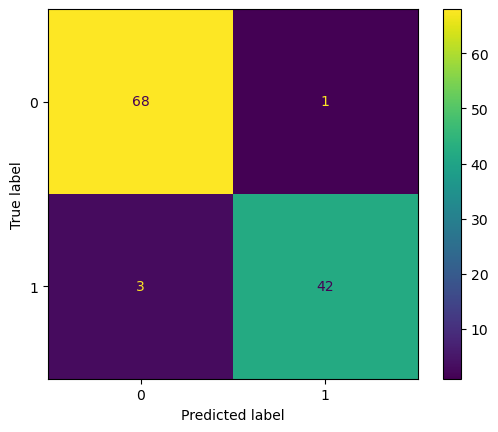

In [94]:
cm_rf25 = confusion_matrix(y_test, y_pred_rf25)
cm_display_rf25 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf25)
cm_display_rf25.plot()
plt.show()

In [95]:
random_forest_25_accuracy = round(100 * accuracy_score(y_test, y_pred_rf25), 2)
model_accuracy['Random Forest Classification (25 trees)'] = random_forest_25_accuracy

random_forest_25_recall = round(100 * recall_score(y_test, y_pred_rf25), 2)
model_recall['Random Forest Classification (25 trees)'] = random_forest_25_recall

print('The accuracy of this model is {} %.'.format(random_forest_25_accuracy))
print('The recall of this model is {} %.'.format(random_forest_25_recall))

The accuracy of this model is 96.49 %.
The recall of this model is 93.33 %.


### Applying Random Forest Classification - 50 Trees:

In [96]:
random_forest_50_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 27)
random_forest_50_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=27)

In [97]:
y_pred_rf50 = random_forest_50_classifier.predict(X_test)

In [98]:
print(classification_report(y_test, y_pred_rf50))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        69
           1       0.95      0.93      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Plotting Confusion Matrix:

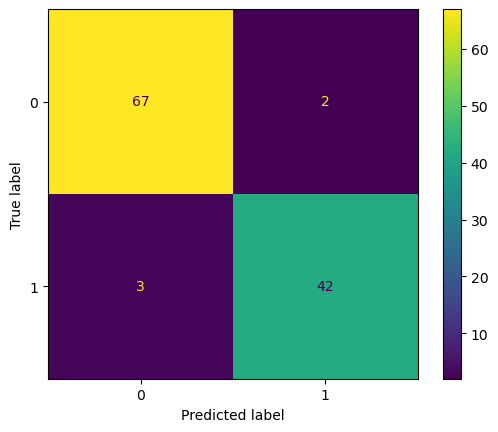

In [99]:
cm_rf50 = confusion_matrix(y_test, y_pred_rf50)
cm_display_rf50 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf50)
cm_display_rf50.plot()
plt.show()

In [100]:
random_forest_50_accuracy = round(100 * accuracy_score(y_test, y_pred_rf50), 2)
model_accuracy['Random Forest Classification (50 trees)'] = random_forest_50_accuracy

random_forest_50_recall = round(100 * recall_score(y_test, y_pred_rf50), 2)
model_recall['Random Forest Classification (50 trees)'] = random_forest_50_recall

print('The accuracy of this model is {} %.'.format(random_forest_50_accuracy))
print('The recall of this model is {} %.'.format(random_forest_50_recall))

The accuracy of this model is 95.61 %.
The recall of this model is 93.33 %.


### Applying Random Forest Classification - 100 Trees:

In [101]:
random_forest_100_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 27)
random_forest_100_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=27)

In [102]:
y_pred_rf100 = random_forest_100_classifier.predict(X_test)

In [103]:
print(classification_report(y_test, y_pred_rf100))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        69
           1       0.95      0.93      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Plotting Confusion Matrix:

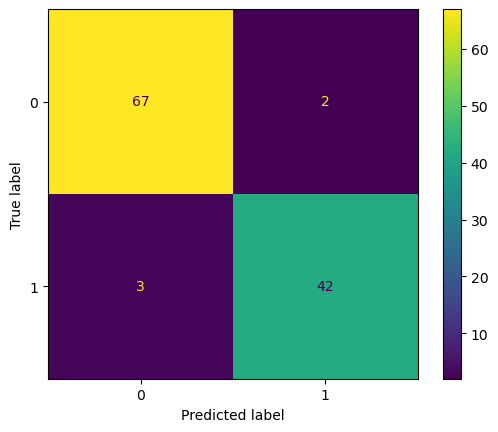

In [104]:
cm_rf100 = confusion_matrix(y_test, y_pred_rf100)
cm_display_rf100 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rf100)
cm_display_rf100.plot()
plt.show()

In [105]:
random_forest_100_accuracy = round(100 * accuracy_score(y_test, y_pred_rf100), 2)
model_accuracy['Random Forest Classification (100 trees)'] = random_forest_100_accuracy

random_forest_100_recall = round(100 * recall_score(y_test, y_pred_rf100), 2)
model_recall['Random Forest Classification (100 trees)'] = random_forest_100_recall

print('The accuracy of this model is {} %.'.format(random_forest_100_accuracy))
print('The recall of this model is {} %.'.format(random_forest_100_recall))

The accuracy of this model is 95.61 %.
The recall of this model is 93.33 %.


### Applying Stacking Classifier:

**Define the base models:**

In [106]:
base_models = list()
base_models.append(('kernel_svc', kernel_svm_classifier))
base_models.append(('5nn', classifier_5nn))
base_models.append(('random_forest_25', random_forest_25_classifier))

**Define the meta models:**

In [107]:
meta_model = logistic_classifier

In [108]:
stacking_classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model)
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('kernel_svc', SVC(random_state=27)),
                               ('5nn', KNeighborsClassifier()),
                               ('random_forest_25',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=25,
                                                       random_state=27))],
                   final_estimator=LogisticRegression(random_state=27))

In [109]:
y_pred_sc = stacking_classifier.predict(X_test)

#### Plotting Confusion Matrix:

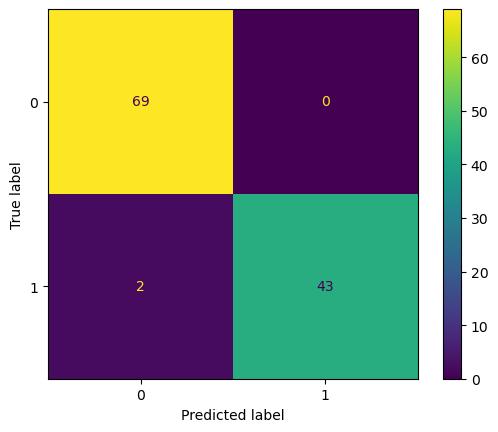

In [110]:
cm_sc = confusion_matrix(y_test, y_pred_sc)
cm_display_sc = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_sc)
cm_display_sc.plot()
plt.show()

In [111]:
stacking_classifier_accuracy = round(100 * accuracy_score(y_test, y_pred_sc), 2)
model_accuracy['Stacking Classifier'] = stacking_classifier_accuracy

stacking_classifier_recall = round(100 * recall_score(y_test, y_pred_sc), 2)
model_recall['Stacking Classifier'] = stacking_classifier_recall

print('The accuracy of this model is {} %.'.format(stacking_classifier_accuracy))
print('The recall of this model is {} %.'.format(stacking_classifier_recall))

The accuracy of this model is 98.25 %.
The recall of this model is 95.56 %.


### MODEL EVALUATION:

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

**Tabulating the results:**

In [112]:
table = []
table.append(['S.No.', 'Classification Model', 'Model Accuracy', 'Model Recall'])
count = 1

for model in model_accuracy:
    row = [count, model, model_accuracy[model], model_recall[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤══════════════════════════════════════════╤══════════════════╤════════════════╕
│   S.No. │ Classification Model                     │   Model Accuracy │   Model Recall │
╞═════════╪══════════════════════════════════════════╪══════════════════╪════════════════╡
│       1 │ Logistic Regression                      │            97.37 │          93.33 │
├─────────┼──────────────────────────────────────────┼──────────────────┼────────────────┤
│       2 │ Linear SVM                               │            97.37 │          93.33 │
├─────────┼──────────────────────────────────────────┼──────────────────┼────────────────┤
│       3 │ Kernel SVM                               │            98.25 │          95.56 │
├─────────┼──────────────────────────────────────────┼──────────────────┼────────────────┤
│       4 │ K - Nearest Neighbors (1 NN)             │            94.74 │          93.33 │
├─────────┼──────────────────────────────────────────┼──────────────────┼────────────────┤

From the above table, we can see that the model - Kernel Support Vector Classification has the highest accuracy of 98.25 percent and a high recall of 95.56 percent.

### Applying K-fold Cross Validation:

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before. This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes.

In [113]:
### Create a list of classifiers

classifiers = []
classifiers.append(logistic_classifier)
classifiers.append(linear_svm_classifier)
classifiers.append(kernel_svm_classifier)
classifiers.append(classifier_1nn)
classifiers.append(classifier_3nn)
classifiers.append(classifier_5nn)
classifiers.append(classifier_7nn)
classifiers.append(classifier_9nn)
classifiers.append(classifier_11nn)
classifiers.append(naive_bayes_classifier)
classifiers.append(decision_tree_classifier)
classifiers.append(random_forest_10_classifier)
classifiers.append(random_forest_25_classifier)
classifiers.append(random_forest_50_classifier)
classifiers.append(random_forest_100_classifier)
classifiers.append(stacking_classifier)

**We will now use this list of classifiers to perform K-fold cross validation.**

In [114]:
### Applying K-fold cross validation and tabulating the results

validation_accuracies = []
standard_deviations = []

for each_classifier in classifiers:
    accuracy = cross_val_score(estimator = each_classifier, X = X_train, y = y_train, cv = 50)
    validation_accuracies.append(np.mean(accuracy) * 100)
    standard_deviations.append(accuracy.std() * 100)
    
validation_accuracies

[96.51111111111112,
 97.42222222222222,
 97.37777777777778,
 94.93333333333334,
 96.93333333333334,
 96.26666666666668,
 96.93333333333334,
 97.82222222222222,
 97.60000000000001,
 93.17777777777778,
 92.53333333333332,
 96.26666666666667,
 95.82222222222222,
 95.82222222222222,
 96.48888888888888,
 97.6]

In [115]:
### Tabulating the results

table = []
table.append(['Model', 'Model Accuracy', 'Recall', 'Validation Accuracy', 'Std. Dev'])
count = 1

for model in model_accuracy:
    row = [model, model_accuracy[model], model_recall[model], validation_accuracies[count - 1], 
           standard_deviations[count - 1]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒══════════════════════════════════════════╤══════════════════╤══════════╤═══════════════════════╤════════════╕
│ Model                                    │   Model Accuracy │   Recall │   Validation Accuracy │   Std. Dev │
╞══════════════════════════════════════════╪══════════════════╪══════════╪═══════════════════════╪════════════╡
│ Logistic Regression                      │            97.37 │    93.33 │               96.5111 │    5.5556  │
├──────────────────────────────────────────┼──────────────────┼──────────┼───────────────────────┼────────────┤
│ Linear SVM                               │            97.37 │    93.33 │               97.4222 │    4.59436 │
├──────────────────────────────────────────┼──────────────────┼──────────┼───────────────────────┼────────────┤
│ Kernel SVM                               │            98.25 │    95.56 │               97.3778 │    5.17239 │
├──────────────────────────────────────────┼──────────────────┼──────────┼───────────────────────┼──────

From the above table, we can see that the validation accuracy is higher in 9 Nearest Neighbors. However, on comparing the models - Kernel SVM, Stacking Classifier and 9 Nearest Neighbors we can see that the Training accuracy, recall, and Validation accuracy is stable in Stacking Classifier model (less standard deviation). Hence, we use the model Stacking Classifier for Breast Cancer Detection.

### PLOTTING THE ROC GRAPH:

In [116]:
### Generate probabilities - No Skill, Stacking Classifier probabilities

no_skill_probabilities = [0] * len(y_test)
stacking_classifier_probabilities = stacking_classifier.predict_proba(X_test)[:, 1]

### Calculate Scores

no_skill_auc = roc_auc_score(y_test, no_skill_probabilities)
stacking_classifier_auc = roc_auc_score(y_test, stacking_classifier_probabilities)

In [117]:
### Summarize Scores

print('No Skill: ROC AUC = %.3f' % (no_skill_auc))
print('Stacking Classifier: ROC AUC = %.3f' % (stacking_classifier_auc))

No Skill: ROC AUC = 0.500
Stacking Classifier: ROC AUC = 0.997


In [118]:
### Calculate ROC curves

no_skill_fpr, no_skill_tpr, _ = roc_curve(y_test, no_skill_probabilities)
stacking_classifier_fpr, stacking_classifier_tpr, _ = roc_curve(y_test, stacking_classifier_probabilities)

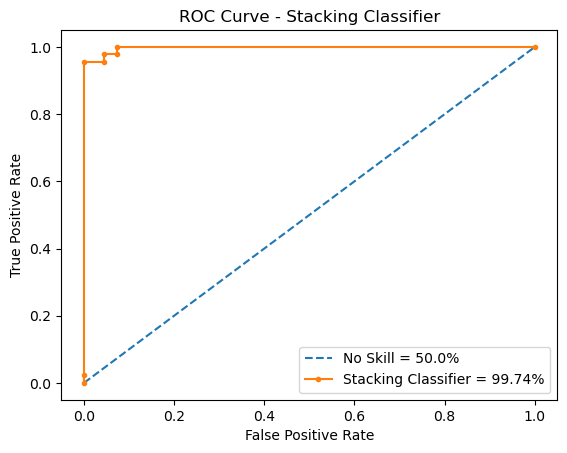

In [119]:
### Plot the ROC Curve

plt.title('ROC Curve - Stacking Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(no_skill_fpr, no_skill_tpr, linestyle = '--', 
         label = 'No Skill = ' + str(round(no_skill_auc * 100, 2)) + '%')
plt.plot(stacking_classifier_fpr, stacking_classifier_tpr, marker = '.', 
         label = 'Stacking Classifier = ' + str(round(stacking_classifier_auc * 100, 2)) + '%')
plt.legend()
plt.show()


### CONCLUSION:

Hence our recommended model - Stacking Classifier provides a model accuracy of 98.25 percent, a model recall of 95.56 percent, and a validation accuracy of 97.6 percent.